Bande interdite
_______________

Bande interdite indirecte d une valeur de 3.6638 [ev]. Nous avons donc un isolant . Le vecteur d'onde k évolue dans la direction \Gamma-F
Les électrons auront encore plus de mal à passer de la bande de valence à la bande de conduction car nous avons un gap indirecte .

Dispersions des bandes électroniques
___________________________________

L'énergie de fermi vaut: 1.34945833 [eV]

La bande de conduction est la bande: 15
Le minimum de la bande de conduction en enlevant l'énergie de Fermi vaut : 3.59224167 [eV]

La bande de valence est la bande: 14
Le maximum de la bande de valence en enlevant l'énergie de Fermi vaut : -0.07155833 [eV]


La plus grande dispersion représentée par la flèche rouge pour la bande de valence est dans la direction Z|L-P et est de 0.6067607617726014 et la dispersion la plus faible représentée par la flèche verte dans la direction L-B1|B  est de 0.013720883656286266

La plus grande dispersion représentée par la flèche rouge pour

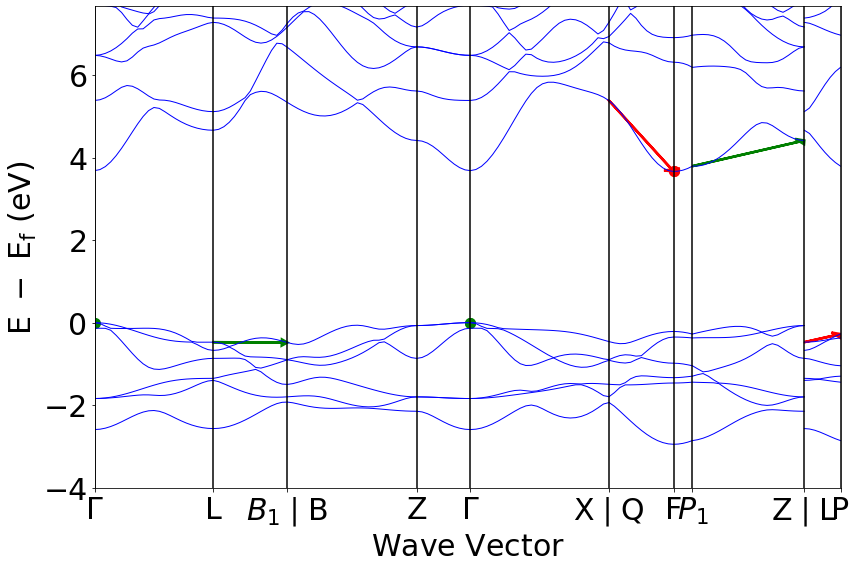

Masse effective
_______________

Pour le calcul ci-dessous, nous aurons besoin des constantes suivantes:
eV= 1.602*10^-19
hbar= 1.054*10^-34
A= 10^-10

Pour calculer la calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) nous supposons une dispersion parabolique.
Pour trouver cette fonction parabolique, nous allons donc prendre le maximum (minimum) de la bande de valence (conduction) et un autre point appartenant à cette même bande.

-Masse effective pour la bande de conduction

Pour la bande de conduction nous prenons comme points ( 5.184922163990358 ; 3.59224167 ) et ( 5.35235314109418 ; 3.7923 )
Comme il nous faut seulement la dérivée seconde de cette fonction ,nous ne devons chercher que le terme a de l'équation E=ak^2+bk+c.
a= 7.136495819644682 [eV/A^2]
Nous n'avons pas les bonnes unitées, il nous faut donc les adapter pour que a soit exprimé en [J/m^2] 
2a=d^2E/dk^2= 2.286533260614156e-38 [J/m^2]

Ce qui donne pour la masse effecti

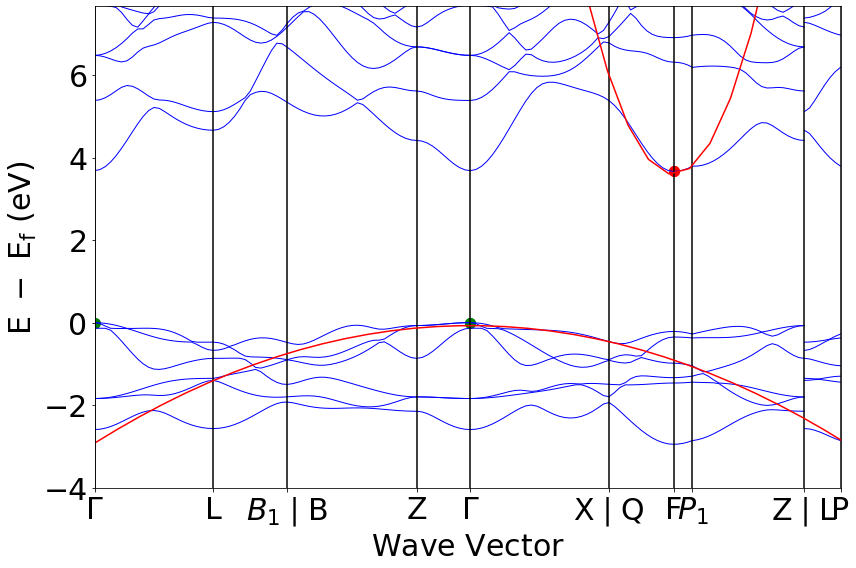

In [424]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice 
from pymatgen.core.structure import Structure, Molecule
from pymatgen.symmetry.structure import SymmetrizedStructure
from pymatgen.core.structure import PeriodicSite
from pymatgen.core.operations import SymmOp
from pymatgen.util.coord import find_in_coord_list, pbc_diff
from pprint import pprint
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSDOSPlotter,BSPlotter,BSPlotterProjected
from scipy import interpolate

with MPRester("QpfJCrDNtAVubMxG") as m:
    bandstructure=m.get_bandstructure_by_material_id("mp-7478")
    
print("Bande interdite")
print("_______________")
print("")

 # permet de trouver l'énergie de Fermi
ef=bandstructure.efermi
bandgap=bandstructure.get_band_gap()
if bandgap['direct']==False  :
    bg="indirecte"
else :
    bg="directe"
if bandgap['energy'] < 2 :
    if bandgap['energy']< 0.1 :
        e= "conducteur"
    else :
        e= "semi-conducteur"
else :
    e="isolant"
print("Bande interdite",bg,"d une valeur de",bandgap['energy'],"[ev].","Nous avons donc un",e,".","Le vecteur d'onde k évolue dans la direction",bandgap['transition'])
print("Les électrons auront encore plus de mal à passer de la bande de valence à la bande de conduction car nous avons un gap",bg,".")
print("")


#trouver la direction dans laquelle la dernière (première) bande de
#valence (conduction) présente le plus et le moins de dispersion
#(insérer une figure indiquant la dispersion par des flèches)
print("Dispersions des bandes électroniques")
print("___________________________________")
print("")
print("L'énergie de fermi vaut:",ef,"[eV]")
print("")
CBM=bandstructure.get_cbm()
print("La bande de conduction est la bande: 15")
print("Le minimum de la bande de conduction en enlevant l'énergie de Fermi vaut :",CBM['energy']-ef,"[eV]")
print("")
VBM=bandstructure.get_vbm()
print("La bande de valence est la bande: 14")
print("Le maximum de la bande de valence en enlevant l'énergie de Fermi vaut :",VBM['energy']-ef,"[eV]")
print("")
#graphe 
graph=BSPlotter(bandstructure)
graph.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
print("")
#Get the data nicely formatted for a plot
DATA=graph.bs_plot_data(zero_to_efermi=True)
#print(DATA)
TICKS=graph.get_ticks()
#axe x les distances et axe y l'énergie , on cherche la plus grande pente 
Daxe_x=TICKS['distance']
ENERGY_axe_y=DATA['energy']
Daxe_x=np.array([Daxe_x[0],Daxe_x[1],Daxe_x[3],Daxe_x[4],Daxe_x[6],Daxe_x[8],Daxe_x[9],Daxe_x[11],Daxe_x[13],Daxe_x[14]])
#print(Distance)
Distance = Daxe_x[1:] - Daxe_x[0:-1]
Penteval=np.zeros(np.shape(Distance))
Pentecondu=np.zeros(np.shape(Distance))
for i in range(np.size(Distance)):
    Penteval[i] = ((ENERGY_axe_y[i].get('1')[14][-1]) - (ENERGY_axe_y[i].get('1')[14][0]))/Distance[i]
    Pentecondu[i] = ((ENERGY_axe_y[i].get('1')[15][-1]) - (ENERGY_axe_y[i].get('1')[15][0]))/Distance[i]
#print(Pentecondu)
#print(Penteval)

Direction=DATA.get('ticks').get('label')
#print(Direction)
PentevalMax=np.max(abs(Penteval))
PentevalMin=np.min(abs(Penteval))
PenteconduMax=np.max(abs(Pentecondu))
PenteconduMin=np.min(abs(Pentecondu))
print("La plus grande dispersion représentée par la flèche rouge pour la bande de valence est dans la direction Z|L-P et est de",PentevalMax ,"et la dispersion la plus faible représentée par la flèche verte dans la direction L-B1|B  est de",PentevalMin)
print("")
print("La plus grande dispersion représentée par la flèche rouge pour la bande de conduction est dans la direction X|Q-F et est de",PenteconduMax ,"et la dispersion la plus faible représentée par la flèche verte dans la direction P1-Z|L est de",PenteconduMin)



#flèche maxval
plt.arrow(Daxe_x[8], ENERGY_axe_y[8].get('1')[14][0], Daxe_x[9] - Daxe_x[8] ,  ENERGY_axe_y[8].get('1')[14][-1] - ENERGY_axe_y[8].get('1')[14][0],
          head_width=0.15, head_length=0.05, linewidth=2.5, color='r', length_includes_head=True)
#flèche minval
plt.arrow(Daxe_x[1], ENERGY_axe_y[1].get('1')[14][0], Daxe_x[2] - Daxe_x[1] ,  ENERGY_axe_y[1].get('1')[14][-1] - ENERGY_axe_y[1].get('1')[14][0],
          head_width=0.15, head_length=0.05, linewidth=2.5, color='g', length_includes_head=True)

#flèche maxcondu
plt.arrow(Daxe_x[5], ENERGY_axe_y[5].get('1')[15][0], Daxe_x[6] - Daxe_x[5] ,  ENERGY_axe_y[5].get('1')[15][-1] - ENERGY_axe_y[5].get('1')[15][0],
          head_width=0.15, head_length=0.05, linewidth=2.5, color='r', length_includes_head=True)
#flèche mincondu
plt.arrow(Daxe_x[7], ENERGY_axe_y[7].get('1')[15][0], Daxe_x[8] - Daxe_x[7] ,  ENERGY_axe_y[7].get('1')[15][-1] - ENERGY_axe_y[7].get('1')[15][0],
          head_width=0.15, head_length=0.05, linewidth=2.5, color='g', length_includes_head=True)

plt.show()
print("Masse effective")
print("_______________")
print("")
print("Pour le calcul ci-dessous, nous aurons besoin des constantes suivantes:")
eV= 1.602*10**-19
hbar= 1.054*10**-34
A= 10**-10
print("eV= 1.602*10^-19")
print("hbar= 1.054*10^-34")
print("A= 10^-10")
print("")
print("Pour calculer la calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) nous supposons une dispersion parabolique.")
print("Pour trouver cette fonction parabolique, nous allons donc prendre le maximum (minimum) de la bande de valence (conduction) et un autre point appartenant à cette même bande.")
print("")
print("-Masse effective pour la bande de conduction")
print("")
graph.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
print("Pour la bande de conduction nous prenons comme points","(",Daxe_x[6],";",CBM['energy']-ef,")","et","(",Daxe_x[7],";",ENERGY_axe_y[7].get('1')[15][0],")")
print("Comme il nous faut seulement la dérivée seconde de cette fonction ,nous ne devons chercher que le terme a de l'équation E=ak^2+bk+c.")
#extrapolation pour la bande de conduction
ypc=[ENERGY_axe_y[7].get('1')[15][0],CBM['energy']-ef,ENERGY_axe_y[7].get('1')[15][0]]
xpc=[Daxe_x[6]-(Daxe_x[7]-Daxe_x[6]),Daxe_x[6],Daxe_x[7]]
fc=interpolate.interp1d(xpc,ypc,fill_value="extrapolate",kind="quadratic")
fcp=np.polyfit(xpc,ypc,2)
print("a=",fcp[0],"[eV/A^2]")
print("Nous n'avons pas les bonnes unitées, il nous faut donc les adapter pour que a soit exprimé en [J/m^2] ")
print("2a=d^2E/dk^2=",2*fcp[0]*A**2*eV,"[J/m^2]")
print("")
print("Ce qui donne pour la masse effective:hbar^2/2a= m*=",hbar**2/(2*fcp[0]*A**2*eV),"[kg]")
xnewc = np.linspace(0,9)

plt.plot(xnewc, fc(xnewc),'r')
print("")


print("-Masse effective pour la bande de valence")
print("")
print("Pour la bande de valence nous prenons comme points","(",Daxe_x[4],";",VBM['energy']-ef,")","et","(",Daxe_x[5],";",ENERGY_axe_y[5].get('1')[14][0],")")
print("Comme il nous faut seulement la dérivée seconde de cette fonction ,nous ne devons chercher que le terme a de l'équation E=ak^2+bk+c.")
#extrapolation pour la bande de valence
ypv=[ENERGY_axe_y[5].get('1')[14][0],VBM['energy']-ef,ENERGY_axe_y[5].get('1')[14][0]]
xpv=[Daxe_x[4]-(Daxe_x[5]-Daxe_x[4]),Daxe_x[4],Daxe_x[5]]
fv=interpolate.interp1d(xpv,ypv,fill_value="extrapolate",kind="quadratic")
fvp=np.polyfit(xpv,ypv,2)
print("a=",fvp[0],"[eV/A^2]")
print("Nous n'avons pas les bonnes unitées, il nous faut donc les adapter pour que a soit exprimé en [J/m^2] ")
print("2a=d^2E/dk^2=",2*fvp[0]*A**2*eV,"[J/m^2]")
print("")
print("Ce qui donne pour la masse effective:hbar^2/2a= m*=",hbar**2/(2*fvp[0]*A**2*eV),"[kg]")
xnewv = np.linspace(0,10)
plt.plot(xnewv, fv(xnewv),'r')

print("")
print("Dans le graphe ci-dessous sont représenté en rouge les approximations paraboliques ")

plt.show()

#masse effective